In [13]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
old_v = tf.logging.get_verbosity()
tf.logging.set_verbosity(tf.logging.ERROR)

using softmax function as activation function

In [5]:
from tensorflow.examples.tutorials.mnist import input_data

In [6]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [11]:
mnist.train.images.shape

(55000, 784)

In [9]:
mnist.train.num_examples

55000

In [12]:
mnist.test.num_examples

10000

In [28]:
image = mnist.train.images[0].reshape(28,28)
print(image.shape)
image

(28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

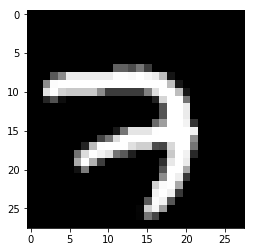

In [30]:
plt.imshow(image,cmap = 'gist_gray')

In [48]:
#place holder
x = tf.placeholder(dtype=tf.float32, shape=[None, 784])

In [49]:
#variables
w = tf.Variable(initial_value=tf.zeros([784, 10])) #10 possible labels, because one-hot
b = tf.Variable(initial_value=tf.zeros([10]))

In [50]:
#create graph
y  = tf.matmul(x,w) + b

In [51]:
#loss function
y_label = tf.placeholder(dtype=tf.float32, shape = [None,10]) # 10 columns because one-hot

In [52]:
cross_en = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_label,logits = y))

In [53]:
#optimizer
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimize.minimize(cross_en)

In [54]:
#create session
init = tf.global_variables_initializer()


In [70]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        #gives 100 samples as one batch, with a tuple of x and corresponding y
        batch_x, batch_y = mnist.train.next_batch(100) 
        #below does the training
        sess.run(train, feed_dict={x: batch_x, y_label: batch_y})
    #below does the testing
    #this actually gives the position, which is actually the number here 
    prediction = tf.equal(tf.argmax(y,axis=1), tf.argmax(y_label,axis=1))
    #[True, False, True, True....]
    #we want to convert these booleans to numbers
    accuracy = tf.reduce_mean(tf.cast(prediction,tf.float32)) #(cast) converts booleans to numbers
    
    print(sess.run(accuracy,feed_dict={x:mnist.test.images, y_label:mnist.test.labels}))

0.9189


basic approach of mnist data, we got 91% accuracy